In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [2]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [3]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,Callback, EarlyStopping, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf
import pickle as pkl
from keras.layers import Dense
import pickle
from tqdm import tqdm
import random
random.seed(123)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
with open("/content/drive/My Drive/Kaggle/train.pkl", "rb") as f1:
    x_train, y_train = pkl.load(f1)

In [5]:

with open("/content/drive/My Drive/Kaggle/test.pkl", "rb") as f2:
    x_test, y_test = pkl.load(f2)


In [6]:
with open("/content/drive/My Drive/Kaggle/val.pkl", "rb") as f3:
    x_val, y_val = pkl.load(f3)

In [7]:
batch_size=16
train_datagen = ImageDataGenerator(
        rescale=1.0/255,  
        height_shift_range= 0.05, 
        width_shift_range=0.1, 
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
train_batch = train_datagen.flow(x_train,y_train,batch_size=batch_size,shuffle=True)
test_batch = test_datagen.flow(x_test,y_test,batch_size=batch_size,shuffle=False)
val_batch = train_datagen.flow(x_val,y_val,batch_size=batch_size,shuffle=False)

In [9]:
file_path="/content/drive/My Drive/Colab Notebooks/best4.hdf5"
llr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,verbose=1, mode='auto',patience=5,min_delta=0.0001,min_lr=1e-6, cooldown=0)
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor="val_loss", mode='auto', patience=10,restore_best_weights=True)
callbacks_list = [llr,checkpoint,early]

In [10]:
def plot_learning_curve(history):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/accuracy_curve4.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/loss_curve4.png')

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/confusion1.png')

In [12]:
model5=Sequential()
model5.add(Conv2D(32,(3,3),activation='relu', input_shape=(128, 128, 3),padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))



model5.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))


model5.add(Flatten())
model5.add(Dropout(0.4))
model5.add(Dense(4,activation='softmax'))
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

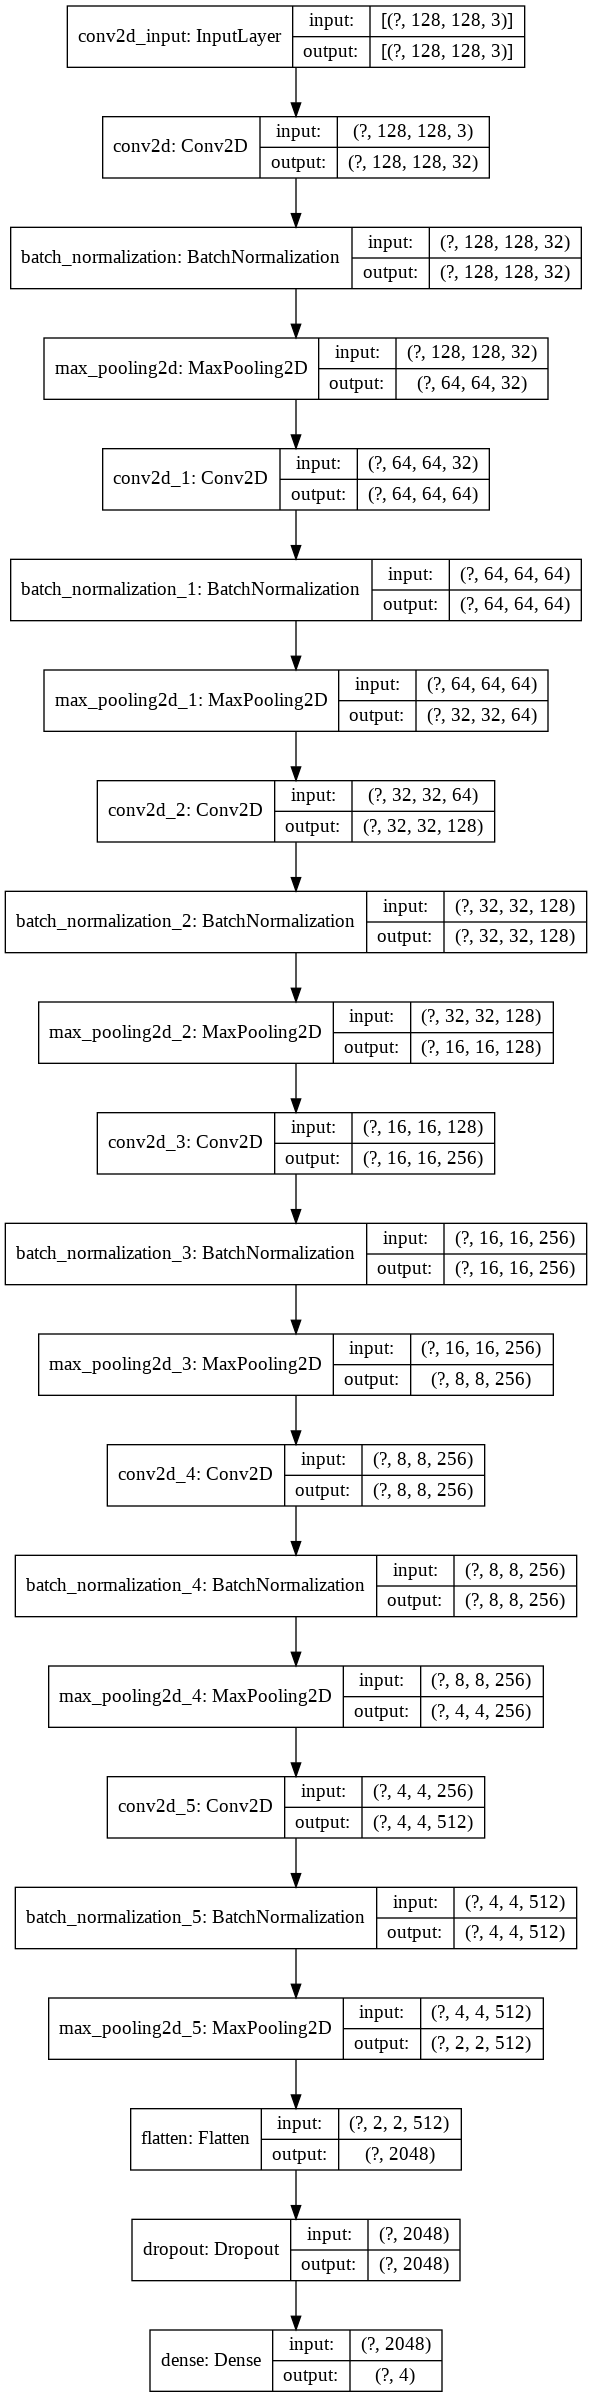

In [13]:
model_img_file = '/content/drive/My Drive/Colab Notebooks/model-6c5.png'
tf.keras.utils.plot_model(model5, to_file=model_img_file, show_shapes=True, show_layer_names=True)

In [14]:
model5.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [15]:
history=model5.fit_generator(train_batch, validation_data=val_batch, epochs=100, validation_steps= x_val.shape[0] // batch_size, 
                       steps_per_epoch= x_train.shape[0] // batch_size, callbacks=[callbacks_list], verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1723/1723 [==============================] - ETA: 0s - loss: 1.2628 - accuracy: 0.6160
Epoch 00001: val_loss improved from inf to 0.78212, saving model to /content/drive/My Drive/Colab Notebooks/best4.hdf5
1723/1723 [==============================] - 130s 76ms/step - loss: 1.2628 - accuracy: 0.6160 - val_loss: 0.7821 - val_accuracy: 0.7270
Epoch 2/100
1723/1723 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.7693
Epoch 00002: val_loss improved from 0.78212 to 0.50312, saving model to /content/drive/My Drive/Colab Notebooks/best4.hdf5
1723/1723 [==============================] - 129s 75ms/step - loss: 0.6891 - accuracy: 0.7693 - val_loss: 0.5031 - val_accuracy: 0.8100
Epoch 3/100
1723/1723 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.8198
Epoch 00003: val_loss did not improve from 0.50312
1723/1723 [==============================] - 128s 74ms/step - 

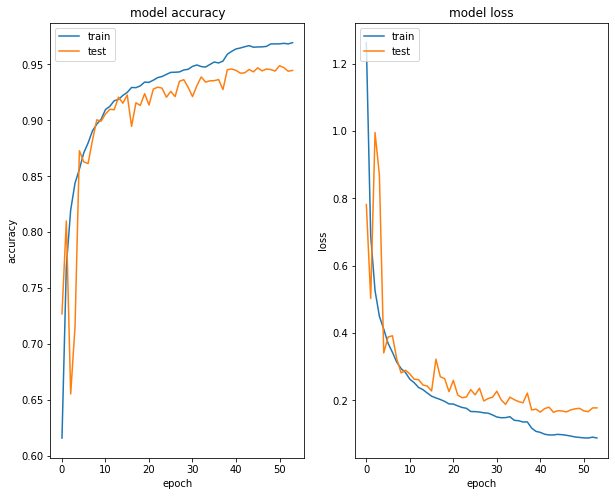

In [16]:
plot_learning_curve(history)
plt.show()

In [17]:
model5.load_weights("/content/drive/My Drive/Colab Notebooks/best4.hdf5")
score=model5.evaluate(test_batch)
print(score[1])

61/61 [==============================] - 1s 9ms/step - loss: 0.1150 - accuracy: 0.9711
0.9710744023323059


In [18]:
y_pred = model5.predict_generator(test_batch,steps = 968)
Y_pred = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

         CNV       0.95      1.00      0.97       242
         DME       1.00      0.92      0.96       242
      DRUSEN       0.95      1.00      0.97       242
      Normal       1.00      0.97      0.98       242

    accuracy                           0.97       968
   macro avg       0.97      0.97      0.97       968
weighted avg       0.97      0.97      0.97       968



--------------------
| Confusion Matrix |
--------------------

 [[242   0   0   0]
 [ 13 223   5   1]
 [  1   0 241   0]
 [  0   0   8 234]]


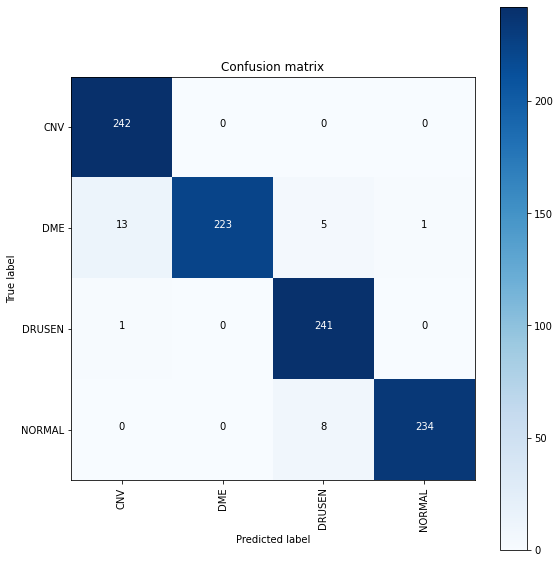

In [19]:
# confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()